In [18]:
# load the data 

import pandas as pd
df = pd.read_csv('./ames/train.csv')

In [6]:
# inspect the data
X = df.copy()
X.head()
y = X.pop("SalePrice")

# removing column id as this is not adding any value
# it caused error in mutual_info_regression if marked as descrete column
X.pop("Id")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# devide in X and y

y = X.pop("SalePrice")
X.pop("Id")

0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: int64

In [8]:
# check column which are not object and has NaN
for column in X.columns:
    if X[column].dtypes != 'object' and X[column].hasnans:
        print(column, X[column].dtypes)
        
        



LotFrontage float64
MasVnrArea float64
GarageYrBlt float64


in this sample got following three column whic han NaN

    LotFrontage float64  - 259 rows NA, ( can this can be discrete values) - Linear feet of street connected to property
    MasVnrArea float64   - Masonry veneer area in square feet- 8 NA this can be converted to 0.
    GarageYrBlt float64  Year garage was built - 81 rows has NA this are basically thoes row which doesn;t have garage  - discrete



In [ ]:
X['LotFrontage'].fillna(0, inplace=True)
X['MasVnrArea'].fillna(0, inplace=True)
X['GarageYrBlt'].fillna(0, inplace=True)

In [9]:
# Handling LotFrontage
# fill all missing value with median value.


median_val = X['LotFrontage'].median()
X['LotFrontage'].fillna(median_val, inplace=True)

In [10]:
# Handling MasVnrAreaz
# fill all missing value with 0 .

X['MasVnrArea'].fillna(0.0, inplace=True)



In [11]:
# Handling GarageYrBlt
# fill all missing value with 0 . and then factorize()

X['GarageYrBlt'].fillna(0, inplace=True)
X['GarageYrBlt'], _ = X['GarageYrBlt'].factorize()
print(X['GarageYrBlt'].dtypes)

int64


In [12]:
# factorize all object type column 
for column in X.columns:
    if X[column].dtypes == 'object':
        X[column], _ = X[column].factorize(na_sentinel = 0)
        

In [13]:
discrete_features = X.dtypes == 'int64'

In [14]:
print(X.shape)
print(y.shape)
print(discrete_features.shape)

(1460, 79)
(1460,)
(79,)


In [16]:
print(discrete_features)
type(discrete_features)
discrete_features

MSSubClass        True
MSZoning          True
LotFrontage      False
LotArea           True
Street            True
                 ...  
MiscVal           True
MoSold            True
YrSold            True
SaleType          True
SaleCondition     True
Length: 79, dtype: bool


MSSubClass        True
MSZoning          True
LotFrontage      False
LotArea           True
Street            True
                 ...  
MiscVal           True
MoSold            True
YrSold            True
SaleType          True
SaleCondition     True
Length: 79, dtype: bool

In [ ]:
X.to_csv('house_data.csv')
discrete_features.to_csv('discrete_features.csv')

In [17]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features = True)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

OverallQual    0.569330
GarageArea     0.491978
GrLivArea      0.432577
YearBuilt      0.406986
TotalBsmtSF    0.398793
                 ...   
BsmtFinSF2     0.000000
PoolQC         0.000000
MiscFeature    0.000000
MoSold         0.000000
YrSold         0.000000
Name: MI Scores, Length: 79, dtype: float64

In [45]:
mi_scores.to_csv('house_feature MI.csv')

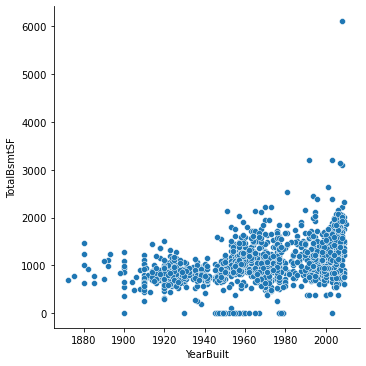

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.relplot(x="YearBuilt", y="TotalBsmtSF", data=df);
# sns.relplot(x="CentralAir", y="SalePrice", data=df);


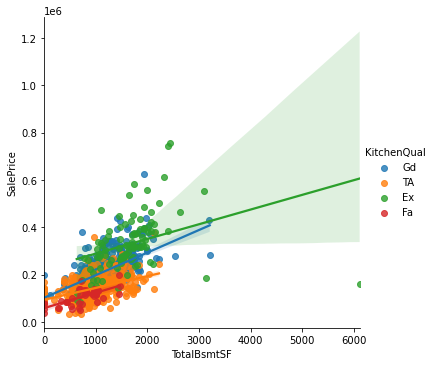

In [37]:
sns.lmplot(x="TotalBsmtSF", y="SalePrice", hue="KitchenQual", data=df);